In [1]:
import util

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
DATADIR = 'data-PREPROCESSED'

In [3]:
# code adapted from 'Hands on Machine Learning with Scikit-Learn, Keras & TensorFlow'
def WideAndDeepModel(params):
    
    # defining model structure
    input_ = keras.layers.Input(shape=params.input_shape)
    hidden1 = keras.layers.Dense(params.n_hid1, activation=params.act)(input_)
    hidden2 = keras.layers.Dense(params.n_hid2, activation=params.act)(hidden1)
    concat = keras.layers.Concatenate()([input_, hidden2])
    output = keras.layers.Dense(params.n_out)(concat)
    
    return keras.Model(inputs=[input_], outputs=[output])


def ANN_Model(params):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(params.n_hid1, activation=params.act))
    #model.add(keras.layers.Dense(params.n_hid2, activation=params.act))
    model.add(keras.layers.Dense(params.n_out))
    
    return model

In [4]:
x_train_full, y_train_full = util.load_training(DATADIR)
x_test, y_test = util.load_test(DATADIR)

In [5]:
# split training full into training and val
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=.2, random_state=42)

In [6]:
print(x_train_full.shape, y_train_full.shape)
print(x_test.shape, y_test.shape)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2336, 25) (2336,)
(584, 25) (584,)
(1868, 25) (1868,)
(468, 25) (468,)


In [7]:
# define params
class params:
    input_shape = None
    act = 'relu'
    n_hid1 = 10
    n_hid2 = 5
    n_out = 1
    
    loss = 'mean_squared_error'
    optimizer = 'sgd'
    n_epochs = 20

In [8]:
ann1 = ANN_Model(params)
ann1.compile(loss=params.loss, optimizer=params.optimizer)
ann1_hist = ann1.fit(x_train, y_train, epochs=params.n_epochs, validation_data=(x_val, y_val))
ann1_mse = ann1.evaluate(x_test, y_test)

Epoch 1/20
59/59 [==============================] - 0s 2ms/step - loss: 125662216.0000 - val_loss: 117587240.0000
Epoch 2/20
59/59 [==============================] - 0s 885us/step - loss: 107507160.0000 - val_loss: 111152960.0000
Epoch 3/20
59/59 [==============================] - 0s 893us/step - loss: 105806312.0000 - val_loss: 110462584.0000
Epoch 4/20
59/59 [==============================] - 0s 915us/step - loss: 105698648.0000 - val_loss: 110239928.0000
Epoch 5/20
59/59 [==============================] - 0s 844us/step - loss: 105695312.0000 - val_loss: 110333328.0000
Epoch 6/20
59/59 [==============================] - 0s 914us/step - loss: 105682984.0000 - val_loss: 110149080.0000
Epoch 7/20
59/59 [==============================] - 0s 916us/step - loss: 105695728.0000 - val_loss: 110286072.0000
Epoch 8/20
59/59 [==============================] - 0s 774us/step - loss: 105685424.0000 - val_loss: 110268192.0000
Epoch 9/20
59/59 [==============================] - 0s 819us/step - loss: 

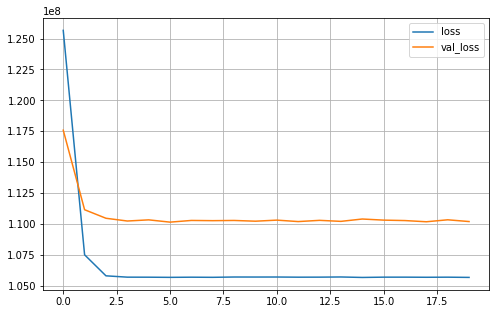

In [9]:
%matplotlib inline
pd.DataFrame(ann1_hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()